In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
DATAPATH = './models/'
# GPU training
DEVICE = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print(f"Training on device {DEVICE}.")
torch.cuda.memory_allocated()

Training on device cuda.


0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


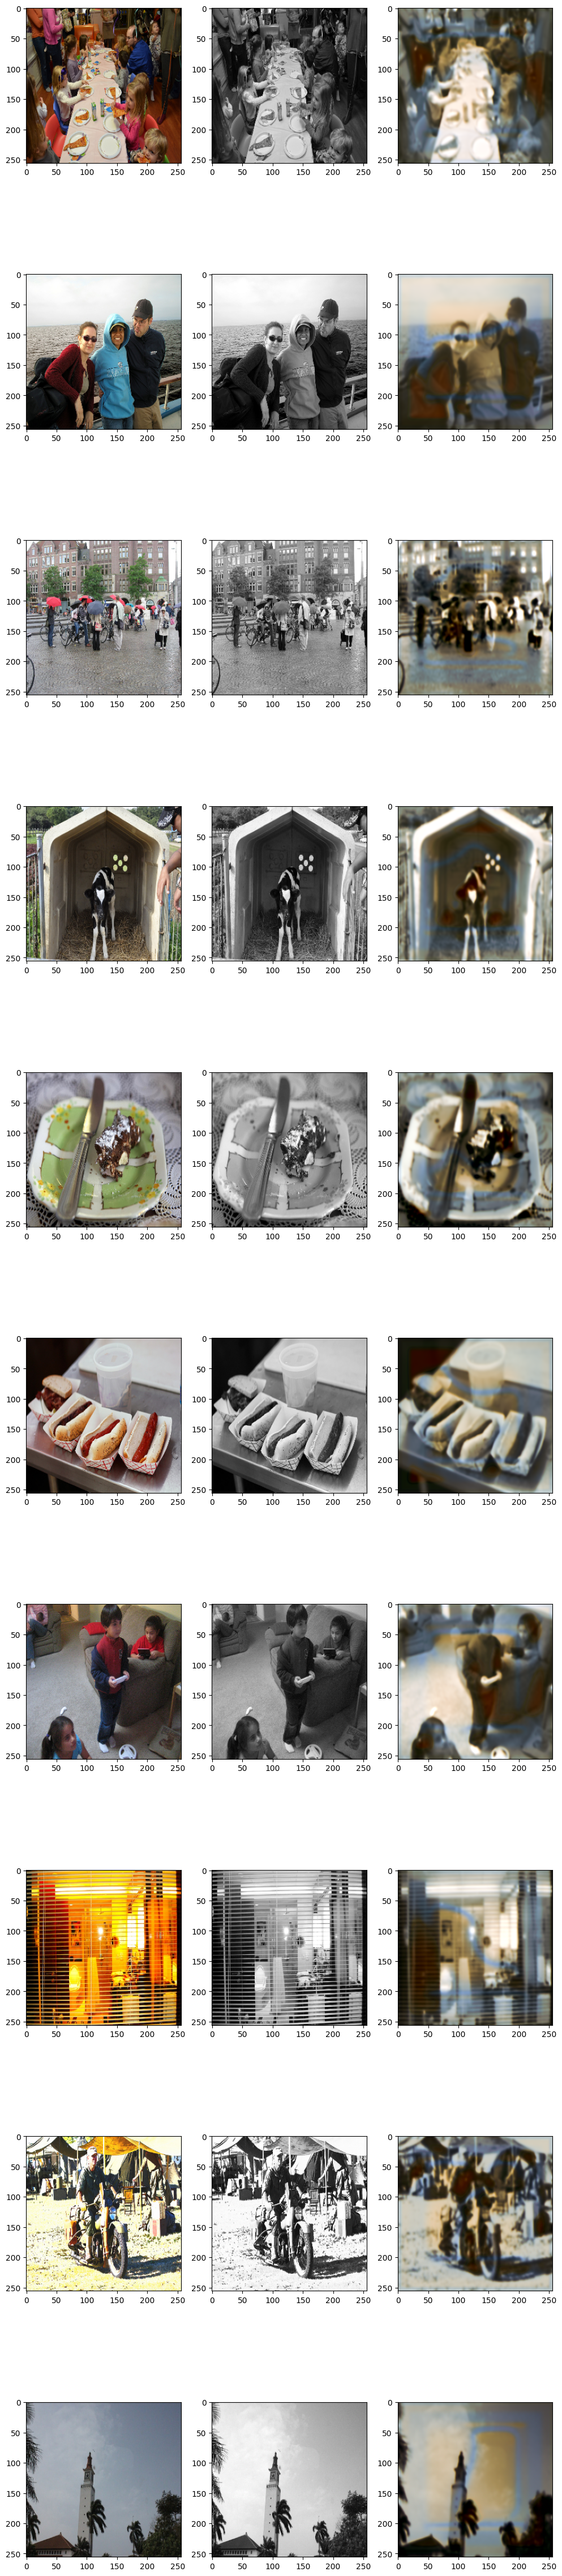

In [4]:
from cocoLoader import load_coco_dataset
from UNet import UNet
from PatchGAN import PatchGAN
from cGANloss import CGANDiscriminatorLoss, CGANGeneratorLoss

train_dataloader, valid_dataloader = load_coco_dataset(batch_size=10, size=10000)
unet = UNet(output_size=256, in_channels=1, out_channels=3, upsampling_mode='bilinear').to(device=DEVICE)
unet.load_state_dict(torch.load(DATAPATH + 'G_00001epoch_46.86valLoss.pt', map_location=DEVICE))
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 60))
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
mean = [-1 * x / y for x, y in zip(mean, std)]
std = [1 / x for x in std]
unnormalize = torchvision.transforms.Normalize(mean=mean, std=std)
for colored, grayscale in valid_dataloader:
    for idx in range(10):
        c = colored[idx]
        g = grayscale[idx]
        plt.subplot(10, 3, 1 + 3 * idx)
        plt.imshow(unnormalize(c).permute(1, 2, 0))
        plt.subplot(10, 3, 2 + 3 * idx)
        plt.imshow(g.permute(1, 2, 0), 'gray')
        generated = unet(g.to(device=DEVICE).unsqueeze(0)).detach().squeeze(0)
        generated = unnormalize(generated)
        plt.subplot(10, 3, 3 + 3 * idx)
        plt.imshow(generated.squeeze(0).cpu().permute(1, 2, 0))
    plt.show()
    break